## Carga y Preparación de Datos
Este bloque carga el dataset y muestra las primeras filas para entender su estructura.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv('Datos_Cardio_IMC_Actualizado.csv')
data.head()
    

,Pasos_diarios,Pulsaciones_diarias,Presion_sistolica,Presion_diastolica,Peso,Edad,Antecedentes_familiares,Ataque_al_corazon,Altura,IMC
0,3732,94,120,95,81,77,0,0,160,31.640625
1,11799,90,172,82,77,27,1,0,194,20.459135
2,10845,76,139,70,60,48,1,1,173,20.047446
3,4264,87,121,98,98,68,0,1,192,26.584201
4,14123,71,140,77,76,44,0,0,167,27.250887


## Exploración de Datos
Se muestra un resumen estadístico para obtener insights sobre la distribución de los datos.

## División de los Datos
Dividimos los datos en conjuntos de entrenamiento y prueba.

In [7]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

features = data.columns[:-1] 
X = data[features]
y = data['Ataque_al_corazon']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    

In [8]:

data.describe()
    

,Pasos_diarios,Pulsaciones_diarias,Presion_sistolica,Presion_diastolica,Peso,Edad,Antecedentes_familiares,Ataque_al_corazon,Altura,IMC
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,8074.572000,79.949000,143.422000,89.412000,84.588000,48.025000,0.523000,0.669000,174.779000,28.231488
std,3974.975818,11.462626,20.340837,11.961577,20.204814,17.711863,0.499721,0.470809,14.319609,8.211793
min,1000.000000,60.000000,110.000000,70.000000,50.000000,18.000000,0.000000,0.000000,150.000000,13.285153
25%,4673.250000,70.000000,126.000000,79.000000,67.000000,33.000000,0.000000,0.000000,162.000000,21.793040
50%,8182.000000,80.000000,144.000000,90.000000,84.000000,48.000000,1.000000,1.000000,175.000000,27.647548
75%,11414.500000,90.000000,161.000000,100.000000,103.000000,63.000000,1.000000,1.000000,188.000000,33.447517
max,14976.000000,99.000000,179.000000,109.000000,119.000000,79.000000,1.000000,1.000000,199.000000,52.888889


In [9]:
grouped_data = data.groupby('Ataque_al_corazon').mean()
print(grouped_data)

                   Pasos_diarios  Pulsaciones_diarias  Presion_sistolica  \
Ataque_al_corazon                                                          
0                    8270.003021            79.564955         136.299094   
1                    7977.878924            80.139013         146.946188   

                   Presion_diastolica       Peso       Edad  \
Ataque_al_corazon                                             
0                           89.510574  80.253776  44.640483   
1                           89.363229  86.732436  49.699552   

                   Antecedentes_familiares      Altura        IMC  
Ataque_al_corazon                                                  
0                                 0.187311  176.709970  26.199863  
1                                 0.689088  173.823617  29.236671  


In [12]:
data.corr()

,Pasos_diarios,Pulsaciones_diarias,Presion_sistolica,Presion_diastolica,Peso,Edad,Antecedentes_familiares,Ataque_al_corazon,Altura,IMC
Pasos_diarios,1.000000,0.056640,-0.009523,0.002710,-0.067345,0.005882,0.020073,-0.034600,-0.067126,-0.009904
Pulsaciones_diarias,0.056640,1.000000,0.002763,0.011542,-0.016130,0.020285,0.047301,0.023579,0.006152,-0.027555
Presion_sistolica,-0.009523,0.002763,1.000000,0.017346,0.017687,-0.009804,-0.015235,0.246437,-0.026908,0.024798
Presion_diastolica,0.002710,0.011542,0.017346,1.000000,-0.025345,0.008513,-0.019505,-0.005800,0.009590,-0.029756
Peso,-0.067345,-0.016130,0.017687,-0.025345,1.000000,-0.037993,0.018487,0.150964,0.021489,0.813590
Edad,0.005882,0.020285,-0.009804,0.008513,-0.037993,1.000000,-0.001139,0.134478,-0.026670,-0.013748
Antecedentes_familiares,0.020073,0.047301,-0.015235,-0.019505,0.018487,-0.001139,1.000000,0.472746,0.000361,0.012756
Ataque_al_corazon,-0.034600,0.023579,0.246437,-0.005800,0.150964,0.134478,0.472746,1.000000,-0.094899,0.174110
Altura,-0.067126,0.006152,-0.026908,0.009590,0.021489,-0.026670,0.000361,-0.094899,1.000000,-0.544488
IMC,-0.009904,-0.027555,0.024798,-0.029756,0.813590,-0.013748,0.012756,0.174110,-0.544488,1.000000


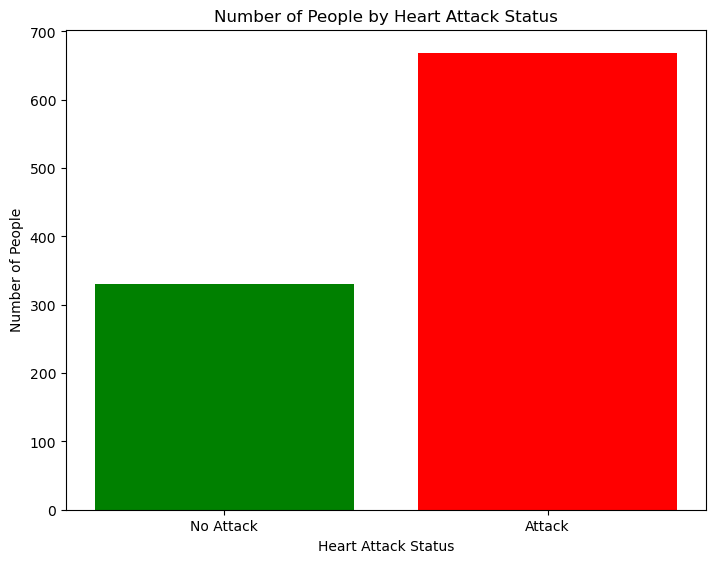

In [14]:
attack_counts = data['Ataque_al_corazon'].value_counts()
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
status = ['No Attack', 'Attack']
counts = [attack_counts[0], attack_counts[1]]  # Asegúrate de que el índice corresponde correctamente

ax.bar(status, counts, color=['green', 'red'])  # Usando colores para diferenciar
plt.xlabel('Heart Attack Status')
plt.ylabel('Number of People')
plt.title('Number of People by Heart Attack Status')
plt.show()

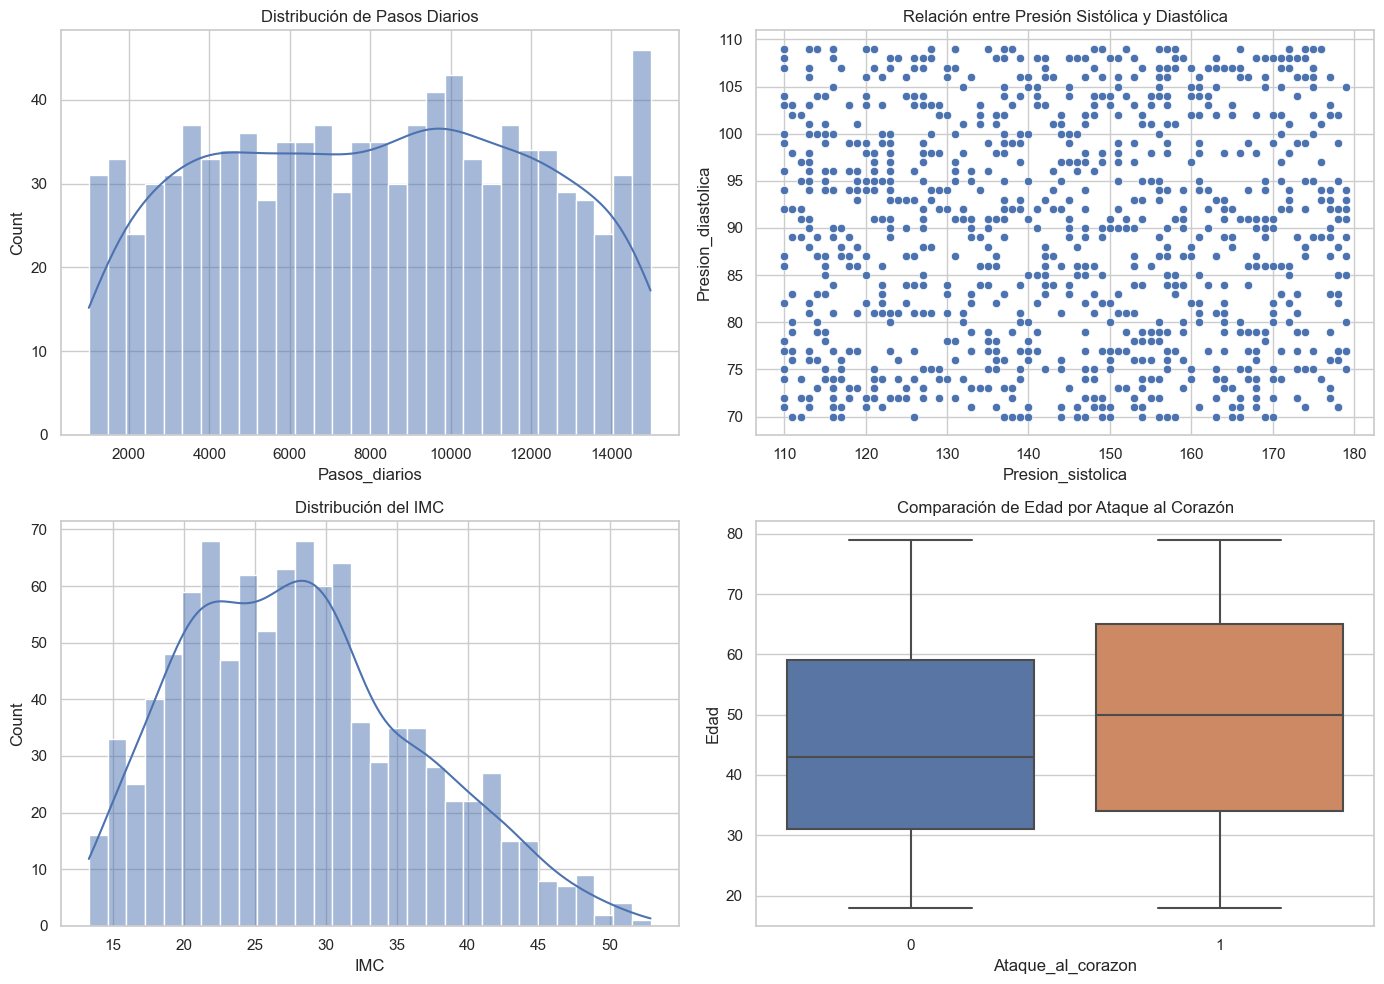

In [17]:

import warnings

warnings.filterwarnings('ignore', category=FutureWarning)
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(data['Pasos_diarios'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribución de Pasos Diarios')

sns.scatterplot(x='Presion_sistolica', y='Presion_diastolica', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Relación entre Presión Sistólica y Diastólica')

sns.histplot(data['IMC'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribución del IMC')

sns.boxplot(x='Ataque_al_corazon', y='Edad', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Comparación de Edad por Ataque al Corazón')

plt.tight_layout()
plt.show()

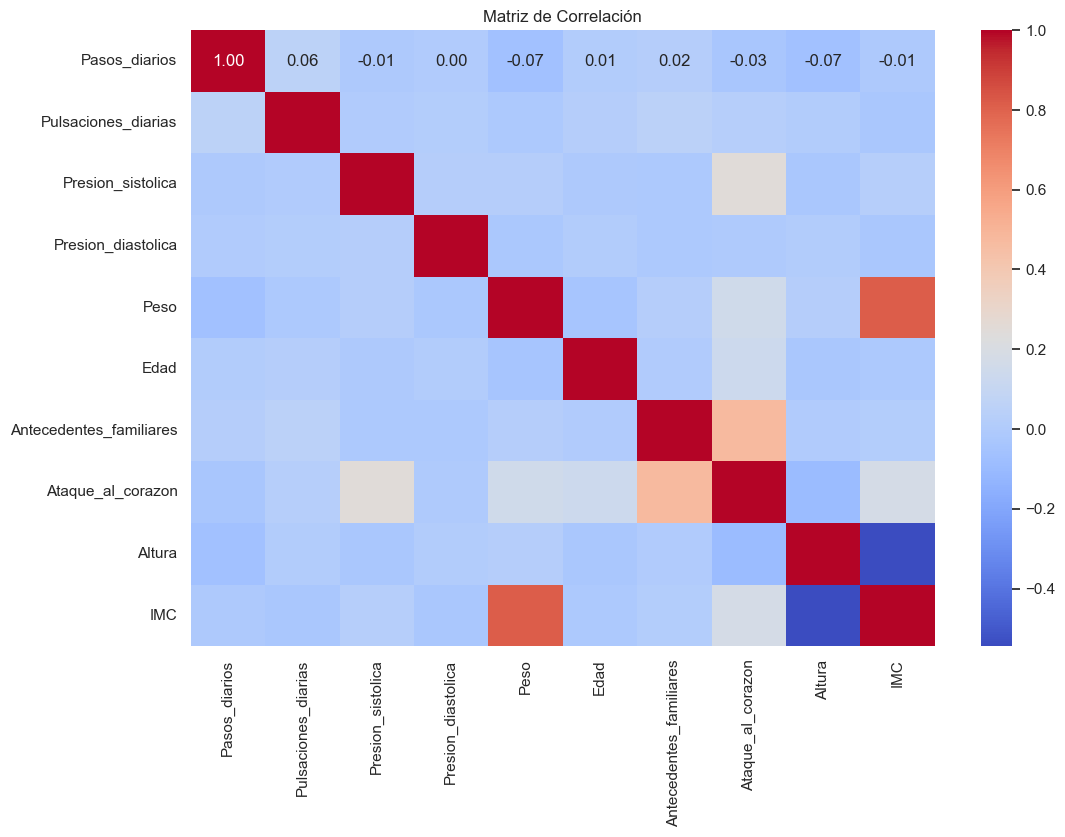

In [18]:
correlation_matrix = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Matriz de Correlación')
plt.show()

NameError: name 'data_cardio' is not defined

## Escalado de Características
Normalizamos las características para mejorar el rendimiento de los modelos.

In [6]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
    

## Entrenamiento de Modelos
Entrenamos varios modelos y comparamos su precisión.

In [13]:
# Modelos a entrenar
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Entrenamiento y evaluación de modelos
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, predictions)
    results[name] = accuracy

results

{'Logistic Regression': 0.755,
 'Naive Bayes': 0.725,
 'Decision Tree': 0.725,
 'Support Vector Machine': 0.74,
 'K-Nearest Neighbors': 0.71}

## Guardar el Modelo
Guardamos el modelo de Regresión Logística seleccionado.

In [15]:

import pickle
# Seleccionar y guardar el modelo de Regresión Logística
model = models['Logistic Regression']
with open('logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)
    